In [1]:
from analysis import *

file_paths = {0: 'single_classification_22/45540945/',
              1: 'single_classification_42/45539118/', 
              2: 'single_regression_2/45540957/',
              3: 'single_regression_11/45540958/'}

number = 20

evaluations = {0: 'train prec', 1: 'train roc', 2: 'train bedroc',
               3: 'val prec', 4: 'val roc', 5: 'val bedroc',
               6: 'test prec', 7: 'test roc', 8: 'test bedroc',
               9: 'EF_2', 10: 'EF_1', 11: 'EF_015', 12: 'EF_01'}

paths = ['../../output/cross_validation/{}'.format(p) for p in file_paths.values()]
model_list = ['single_classification_22', 'single_classification_42', 'single_regression_2', 'single_regression_11']

In [2]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
for k in range(4):
    print 'Check ', file_paths[k]
    check_result_completeness(dir_='../../output/cross_validation/', file_path=file_paths[k], number=number)
    print

Check  single_classification_22/45540945/
All output result complete.

Check  single_classification_42/45539118/
All output result complete.

Check  single_regression_2/45540957/
All output result complete.

Check  single_regression_11/45540958/
All output result complete.



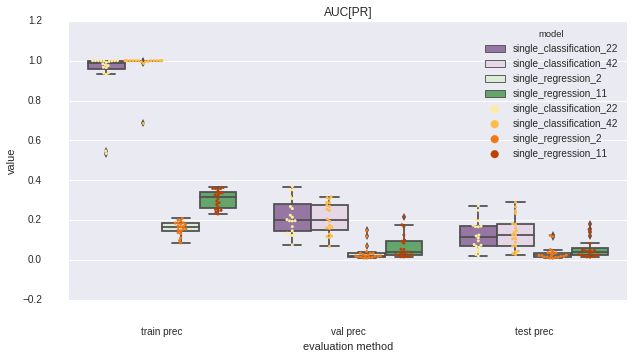

In [4]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[0], evaluations[3], evaluations[6]],
                      model_list=model_list,
                      title='AUC[PR]')

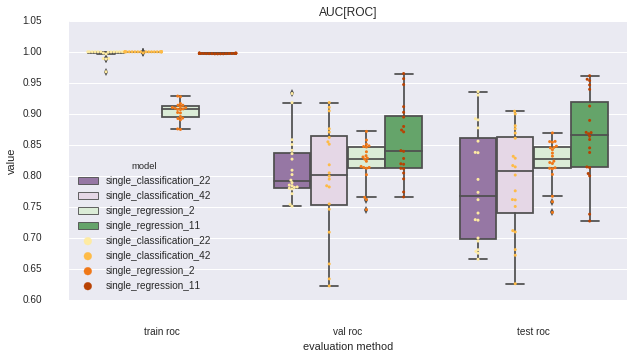

In [5]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[1], evaluations[4], evaluations[7]],
                      model_list=model_list,
                      title='AUC[ROC]')

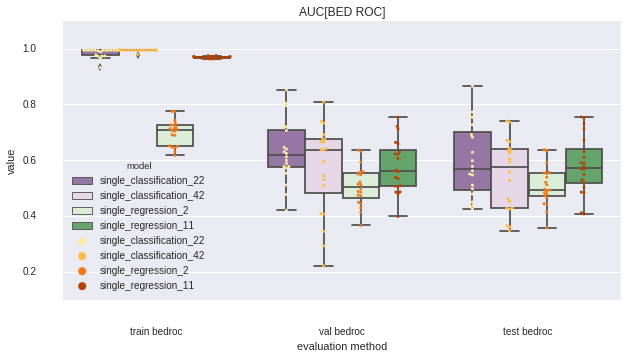

In [6]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[2], evaluations[5], evaluations[8]],
                      model_list=model_list,
                      title='AUC[BED ROC]')

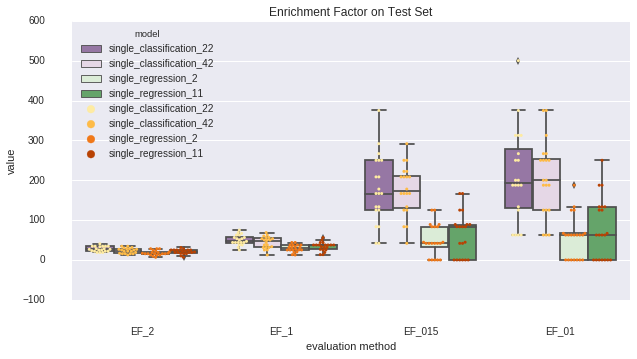

In [7]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[9], evaluations[10], evaluations[11], evaluations[12]],
                      model_list=model_list,
                      title='Enrichment Factor on Test Set')

# Get EF curve

In [9]:
from EF_curve_support import *

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 15.0)

Using Theano backend.
Using gpu device 0: Tesla K40m (CNMeM is disabled, CuDNN 4004)


In [10]:
json_file_list = ['single_classification_22.json',
                  'single_classification_42.json',
                  'single_regression_2.json',
                  'single_regression_11.json']

json_paths = ['../../output/cross_validation/{}'.format(p) for p in json_file_list]
print json_paths

weights_dir_paths = ['../../output/cross_validation/single_classification_22/45540945/',
                     '../../output/cross_validation/single_classification_42/45539118/',
                     '../../output/cross_validation/single_regression_2/45540957/',
                     '../../output/cross_validation/single_regression_11/45540958/']

model_names_list = ['single_classification_22',
                    'single_classification_42',
                    'single_regression_2',
                    'single_regression_11']

['../../output/cross_validation/single_classification_22.json', '../../output/cross_validation/single_classification_42.json', '../../output/cross_validation/single_regression_2.json', '../../output/cross_validation/single_regression_11.json']


In [11]:
EF_ratio_list = np.linspace(0.001, 0.15, 100)

data_pd_0 = get_EF_curve_in_pd(EF_ratio_list=EF_ratio_list,
                               config_json_file=json_paths[0],
                               weight_dir=weights_dir_paths[0],
                               model_name=model_names_list[0],
                               regenerate=True)

running index  0
(14486, 1)
running index  1
(14486, 1)
running index  2
(14486, 1)
running index  3
(14486, 1)
running index  4
(14482, 1)
running index  5
(14482, 1)
running index  6
(14482, 1)
running index  7
(14482, 1)
running index  8
(14484, 1)
running index  9
(14484, 1)
running index  10
(14484, 1)
running index  11
(14484, 1)
running index  12
(14485, 1)
running index  13
(14485, 1)
running index  14
(14485, 1)
running index  15
(14485, 1)
running index  16
(14486, 1)
running index  17
(14486, 1)
running index  18
(14486, 1)
running index  19
(14486, 1)


In [12]:
data_pd_1 = get_EF_curve_in_pd(EF_ratio_list=EF_ratio_list,
                               config_json_file=json_paths[1],
                               weight_dir=weights_dir_paths[1],
                               model_name=model_names_list[1],
                               regenerate=True)

running index  0
(14486, 1)
running index  1
(14486, 1)
running index  2
(14486, 1)
running index  3
(14486, 1)
running index  4
(14482, 1)
running index  5
(14482, 1)
running index  6
(14482, 1)
running index  7
(14482, 1)
running index  8
(14484, 1)
running index  9
(14484, 1)
running index  10
(14484, 1)
running index  11
(14484, 1)
running index  12
(14485, 1)
running index  13
(14485, 1)
running index  14
(14485, 1)
running index  15
(14485, 1)
running index  16
(14486, 1)
running index  17
(14486, 1)
running index  18
(14486, 1)
running index  19
(14486, 1)


In [13]:
data_pd_2 = get_EF_curve_in_pd(EF_ratio_list=EF_ratio_list,
                               config_json_file=json_paths[2],
                               weight_dir=weights_dir_paths[2],
                               model_name=model_names_list[2],
                               regenerate=True)

running index  0
(14486, 2)
running index  1
(14486, 2)
running index  2
(14486, 2)
running index  3
(14486, 2)
running index  4
(14482, 2)
running index  5
(14482, 2)
running index  6
(14482, 2)
running index  7
(14482, 2)
running index  8
(14484, 2)
running index  9
(14484, 2)
running index  10
(14484, 2)
running index  11
(14484, 2)
running index  12
(14485, 2)
running index  13
(14485, 2)
running index  14
(14485, 2)
running index  15
(14485, 2)
running index  16
(14486, 2)
running index  17
(14486, 2)
running index  18
(14486, 2)
running index  19
(14486, 2)


In [14]:
data_pd_3 = get_EF_curve_in_pd(EF_ratio_list=EF_ratio_list,
                               config_json_file=json_paths[3],
                               weight_dir=weights_dir_paths[3],
                               model_name=model_names_list[3],
                               regenerate=True)

running index  0
(14486, 2)
running index  1
(14486, 2)
running index  2
(14486, 2)
running index  3
(14486, 2)
running index  4
(14482, 2)
running index  5
(14482, 2)
running index  6
(14482, 2)
running index  7
(14482, 2)
running index  8
(14484, 2)
running index  9
(14484, 2)
running index  10
(14484, 2)
running index  11
(14484, 2)
running index  12
(14485, 2)
running index  13
(14485, 2)
running index  14
(14485, 2)
running index  15
(14485, 2)
running index  16
(14486, 2)
running index  17
(14486, 2)
running index  18
(14486, 2)
running index  19
(14486, 2)


In [15]:
whole_pd = data_pd_0
whole_pd = whole_pd.append(data_pd_1)
whole_pd = whole_pd.append(data_pd_2)
whole_pd = whole_pd.append(data_pd_3)

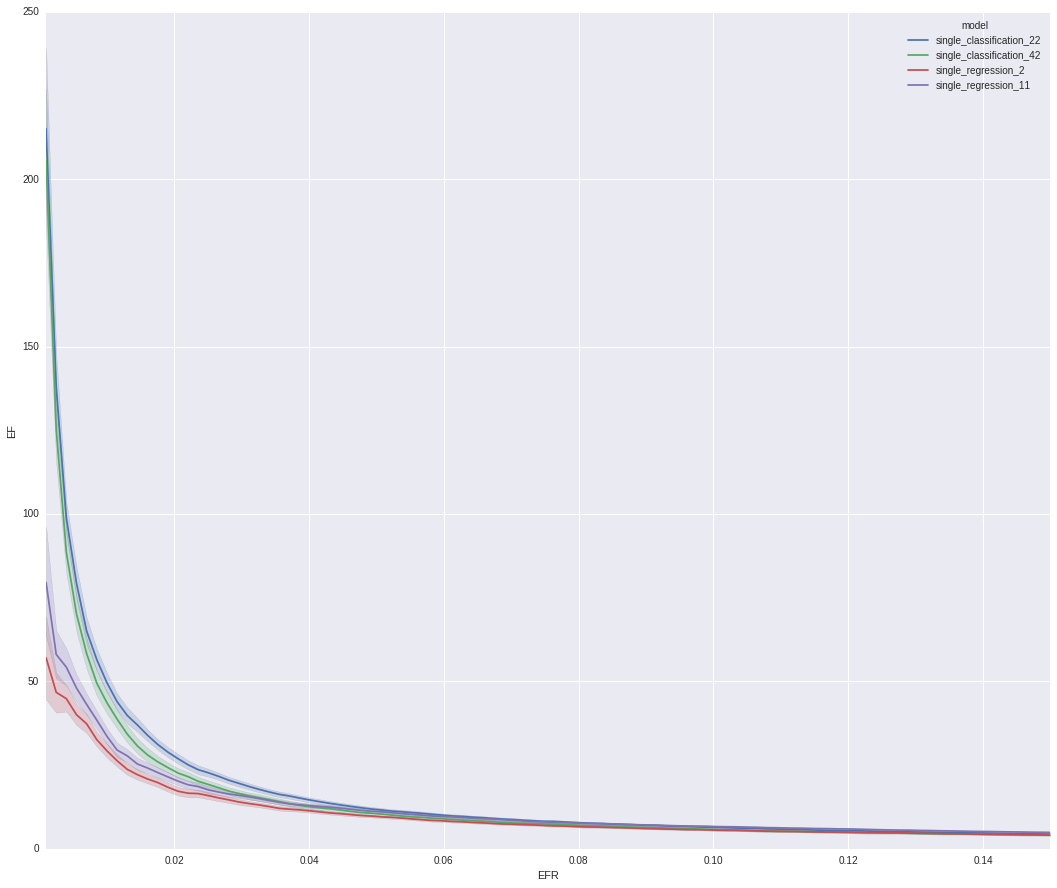

In [16]:
sns.tsplot(data=whole_pd, time="EFR", unit="running process", condition="model", value="EF")